In [14]:
import sqlite3
import pandas as pd
import plotly.express as px

In [29]:
# Connect to a database (or create it if it doesn't exist)
database_title = 'crime_data_2023_9.db'
connection = sqlite3.connect(database_title)

# Create a cursor
cursor = connection.cursor()

In [30]:
# Query data from the table
cursor.execute("SELECT * FROM crimes")
records = cursor.fetchall()

for record in records:
    print(record)

(113177698, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113189990, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113173205, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113180798, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113173466, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113171988, 'avon-and-somerset', 'bicycle-theft', 'Unable to prosecute suspect', '2023-10')
(113189783, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113188066, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113176435, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113188001, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113172516, 'avon-and-somerset', 'bicycle-theft', 'Under investigation', '2023-09')
(113170852, 'avon-and-somerset', 'bicycle-theft', 'Under investigati

In [31]:
# Get the column names from the cursor description
columns = [desc[0] for desc in cursor.description]

In [32]:
# Create a DataFrame from the records and column names
df = pd.DataFrame(records, columns=columns)

# Print the DataFrame
print(df)

             id               city       category  \
0     113177698  avon-and-somerset  bicycle-theft   
1     113189990  avon-and-somerset  bicycle-theft   
2     113173205  avon-and-somerset  bicycle-theft   
3     113180798  avon-and-somerset  bicycle-theft   
4     113173466  avon-and-somerset  bicycle-theft   
...         ...                ...            ...   
7083  113051002     west-yorkshire    other-crime   
7084  113062741     west-yorkshire    other-crime   
7085  113047956     west-yorkshire    other-crime   
7086  113050394     west-yorkshire    other-crime   
7087  113052784     west-yorkshire    other-crime   

                                             status     date  
0                               Under investigation  2023-09  
1                               Under investigation  2023-09  
2                               Under investigation  2023-09  
3                               Under investigation  2023-09  
4                               Under investigat

In [33]:
crimes_by_city = df.groupby('city')['category'].count().reset_index()
crimes_by_city.rename(columns={'category': 'crimes'}, inplace=True)

In [34]:
crimes_by_city

,city,crimes
0,avon-and-somerset,952
1,bedfordshire,189
2,cambridgeshire,222
3,city-of-london,94
4,dorset,20
5,dyfed-powys,481
6,essex,145
7,gloucestershire,226
8,gwent,15
9,hertfordshire,137


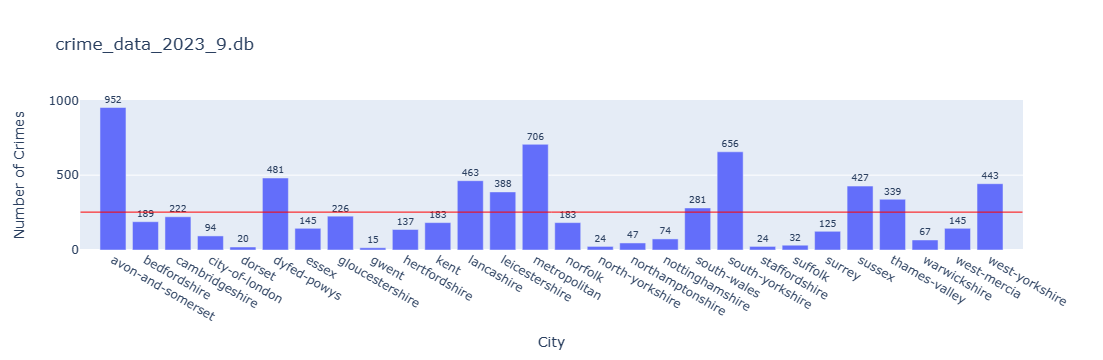

In [35]:
# Create the bar chart
fig = px.bar(crimes_by_city, x='city', y='crimes',
             text_auto=True,
             title=database_title,
             labels={'city': 'City', 'crimes': 'Number of Crimes'})

# Calculate the mean number of stores
mean_crimes = crimes_by_city['crimes'].mean()

# Add a line representing the mean number of stores
fig.add_shape(type='line',
              x0=-1, y0=mean_crimes,
              x1=len(crimes_by_city), y1=mean_crimes,
              line=dict(color='red', width=1))

fig.update_traces(textfont_size=9, textangle=0, textposition="outside", cliponaxis=False)

fig.show()